In [1]:
a = [1,2,3]
b = a
c = [1,2,3]
print(a == b, a == c, a is b, a is c)

True True True False


In [8]:
my_lst = [1, "2", 3, "4"]
two = ("a", "b", "c", "d")


my_lst.in
print(my_lst)


[1, '2', 3]


In [9]:
config = {
    "server": {
        "host": "127.0.0.1",
        "port": "22"
    },
    "configuration": {
        "ssh": {
            "access": True,
            "login": "some",
            "password": "some"
        },
        "name": "2491Oaaf1414"
    }
}

In [15]:
s = 'sdlfjkgslvr alsdjb  lakbsl har'

s = s.replace(' ', '')

s.isalnum()

True

In [ ]:
чем отличается объявление функции от её вызова?

lambda arg: arg if arg in cities else 0
lambda arg: arg if arg in cities else 0

In [19]:
import numpy as np

x = np.zeros((5, 6))

x

TypeError: Cannot interpret '6' as a data type

In [28]:
def apply_discounts(products, stocks):
    discounted_products = {}
    for product, price in products.items():
        if product in stocks:
            # discounted_products[product] = round(price / 100 * (100 - stocks[product], 2))
            discount = int(stocks[product].replace('%', ''))
            discounted_products[product] = round(price * (1 - discount/100), 2)
        else:
            discounted_products[product] = round(price, 2)
            
    return discounted_products



products = {'Oranges (packaged)': 114.99, 'Candy (Rotfront)': 280.0, 'Boiled sausage': 199.99, 'Juice J7 (orange)': 119.99, 'Trout (Seven Seas)': 399.99}
stocks = {'Boiled sausage': '33%', 'Juice J7 (orange)': '12%', 'Trout (Seven Seas)': '18%'}

apply_discounts(products, stocks)

{'Oranges (packaged)': 114.99,
 'Candy (Rotfront)': 280.0,
 'Boiled sausage': 133.99,
 'Juice J7 (orange)': 105.59,
 'Trout (Seven Seas)': 327.99}

In [ ]:
import pandas as pd


solar_data = pd.read_csv('solarpower/solarpower.csv')
solar_data.head()

print(solar_data[solar_data.cum_power == -1])

print(solar_data['cum_power'][45])
for i, n in enumerate(solar_data.cum_power):
    print(i,n)
    if n == -1.0:
        solar_data['cum_power'][i] = (solar_data['cum_power'][i-1] + solar_data['cum_power'][i+2]) / 2

print(solar_data[solar_data.cum_power == -1])

In [71]:
import pandas as pd

solar_data = pd.read_csv("solarpower/solarpower.csv")
solar_data.head()

print(solar_data[solar_data.cum_power == -1])

for i, n in enumerate(solar_data["cum_power"]):
    if n == -1.0:
        solar_data.at[i, "cum_power"] = (
            solar_data.at[i - 1, "cum_power"] + solar_data.at[i + 1, "cum_power"]
        ) / 2

print(solar_data.cum_power.mean().round())

           date  cum_power
45   2017-02-15       -1.0
647  2018-10-10       -1.0
23848.0


In [72]:
# solar_data.head(15)

import datetime as dt

solar_data.date = pd.to_datetime(solar_data.date)

In [73]:
solar_data.head()

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


In [74]:
solar_data.head(15)

for i, n in enumerate(solar_data.cum_power):
    if i != 0:
        solar_data.at[i, "day_power"] = (
            solar_data.at[i, "cum_power"] - solar_data.at[i - 1, "cum_power"]
        )
    else:
        solar_data.at[i, "day_power"] = -1
        
solar_data.at[0, "day_power"] = solar_data.day_power.median()

In [110]:
solar_data.head()

,date,cum_power,day_power
0,2017-01-01,20111.0,11.0
1,2017-01-02,20112.0,1.0
2,2017-01-03,20115.0,3.0
3,2017-01-04,20117.0,2.0
4,2017-01-05,20119.0,2.0


In [141]:
solar_data["monthly_power"] = solar_data["date"].dt.to_period(freq="M")
mounthy_df = (
    solar_data.groupby('monthly_power', as_index=False)[['day_power', 'date']]
    .mean(numeric_only=True)
    .round()
)

# mounthy_df["day_power"] = mounthy_df["day_power"].astype(str)
mounthy_df["monthly_power"] = mounthy_df["monthly_power"].astype(str)

mounthy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   monthly_power  22 non-null     object 
 1   day_power      22 non-null     float64
dtypes: float64(1), object(1)
memory usage: 480.0+ bytes


C:\Users\redsh\AppData\Local\Temp\ipykernel_17804\2464374727.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  solar_line.set_xticklabels(solar_line.get_xticklabels(),rotation=45);


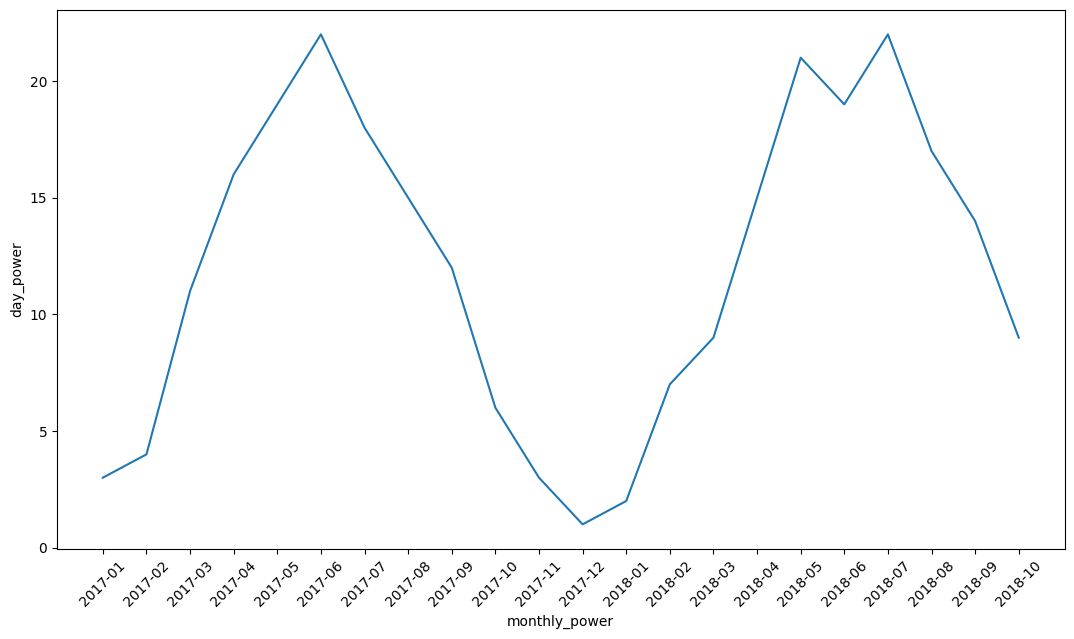

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(13, 7))



solar_line = sns.lineplot(
    data=mounthy_df,
    x="monthly_power",
    y="day_power",
    legend="auto",
)

solar_line.set_xticklabels(solar_line.get_xticklabels(),rotation=45);